##### 데이터생성 예제

In [ ]:
# import numpy as np
# import numpy.matlib

# N = 100
# m1 = np.array([0, 0])
# s1 = np.array([[9,0],[0,1]])
# m2 = np.array([0,4])
# s2 = np.array([[9,0],[0,1]])

# X1 = np.random.randn(N,2) @ np.sqrt(s1) + np.matlib.repmat(m1, N, 1)
# X2 = np.random.randn(N,2) @ np.sqrt(s2) + np.matlib.repmat(m2, N, 1)

# X1.shape, X2.shape

##### 데이터생성 (load matlab data)

In [ ]:
import numpy as np
import numpy.matlib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir(r"/content/gdrive/MyDrive/Colab Notebooks/knou_study/matlab data")

In [ ]:
from numpy import genfromtxt
X1 = genfromtxt('X1.csv', delimiter=',') # skip_header = 1 컬럼값 저장되어있으면 삭제
X2 = genfromtxt('X2.csv', delimiter=',')

X1.shape, X2.shape

((100, 2), (100, 2))

##### 데이터 산점도 확인

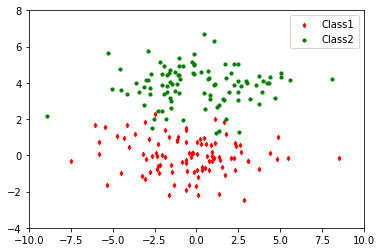

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X1[:,0], X1[:,1], marker='d', color ='r', s = 10, label = 'Class1')
plt.scatter(X2[:,0], X2[:,1], marker='o', color ='g', s = 10, label = 'Class2')
plt.axis([-10, 10, -4, 8])
plt.legend()
plt.show()

##### PCA 분석

In [ ]:
X = np.vstack([X1, X2])
M = np.mean(X, axis=0)
S = np.cov(X[:,0].reshape(-1), X[:,1].reshape(-1))

W, V = np.linalg.eig(S) 
D = np.diag(np.diag(S)) #실제로는 W값이 octave와 조금다름 대각행렬형태로 출력
 
S, V, W, D

(array([[7.64814823, 0.35780621],
        [0.35780621, 4.84862945]]), array([[ 0.9921814 , -0.12480414],
        [ 0.12480414,  0.9921814 ]]), array([7.69315582, 4.80362186]), array([[7.64814823, 0.        ],
        [0.        , 4.84862945]]))

In [ ]:
#octave V
# 0.1248	-0.99218 
#-0.99218	-0.1248
#octave D
# 4.8036	0
# 0     	7.6932
w1 = -V[:,0] #고유백터행렬에 (-) 하여 octave와 매칭한다.
w1.shape, w1

((2,), array([-0.9921814 , -0.12480414]))

주성분벡터 그림

대각행렬의 요소만큼 곱해서줘서 길이를 늘리고 평균을 더해 위치보정

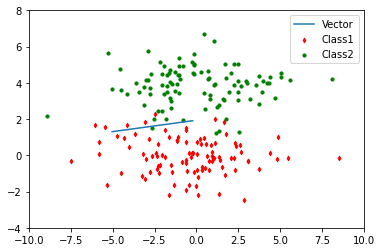

In [ ]:
plt.scatter(X1[:,0], X1[:,1], marker='d', color ='r', s = 10, label = 'Class1')
plt.scatter(X2[:,0], X2[:,1], marker='o', color ='g', s = 10, label = 'Class2')
plt.axis([-10, 10, -4, 8])
plt.plot([0, w1[0] * D[1,1]]+M[0], 
         [0, w1[1] * D[1,1]]+M[1], label = 'Vector')
plt.legend()
plt.show()

In [ ]:
YX1,  YX2   =  w1.T @ X1.T,  w1.T @ X2.T
pYX1, pYX2  =  w1.reshape(-1,1)   @ YX1.reshape(1,100) ,  w1.reshape(-1,1)   @ YX2.reshape(1,100)

YX1.shape, pYX1.shape

((100,), (2, 100))

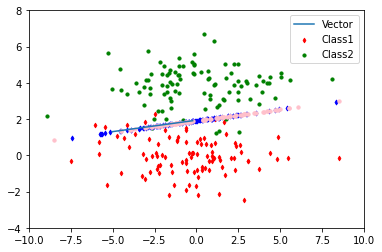

In [ ]:
plt.scatter(X1[:,0], X1[:,1], marker='d', color ='r', s = 10, label = 'Class1')
plt.scatter(X2[:,0], X2[:,1], marker='o', color ='g', s = 10, label = 'Class2')
plt.axis([-10, 10, -4, 8])
plt.plot([0, w1[0] * D[1,1]]+M[0], 
         [0, w1[1] * D[1,1]]+M[1], label = 'Vector')
plt.scatter(pYX1[0,:], pYX1[1,:]+M[1], marker='d', color = 'b', s = 11)
plt.scatter(pYX2[0,:], pYX2[1,:]+M[1], marker='o', color = 'pink', s= 11)

plt.legend()
plt.show()

##### LDA 분석

In [ ]:
N = 100
m1, m2 = np.mean(X1, axis=0), np.mean(X2, axis=0)
#within scatter 클래스내 공분산
Sw = N * np.cov(X1[:,0].reshape(-1), X1[:,1].reshape(-1)) + \
     N * np.cov(X2[:,0].reshape(-1), X2[:,1].reshape(-1))
#between scatter 클래스간 공분산
Sb = (m1 - m2).reshape(-1,1) * (m1-m2) #전치가.T로해도 2차원백터는 shape변화는 일어나지 않음.

#고유치분석, 행렬간공분산 * 클래스내 공분산역행렬
W1, V1 = np.linalg.eig(Sb @ np.linalg.inv(Sw)) # octave와 같은 동일한배열로 출력된다.
D1 = np.diag(np.diag(Sb @ np.linalg.inv(Sw))) 

w = V1[:,1] #주성분 백터

주성분 백터 그리기

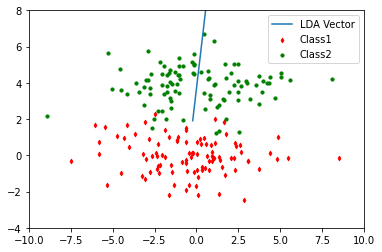

In [ ]:
plt.scatter(X1[:,0], X1[:,1], marker='d', color ='r', s = 10, label = 'Class1')
plt.scatter(X2[:,0], X2[:,1], marker='o', color ='g', s = 10, label = 'Class2')
plt.axis([-10, 10, -4, 8])
plt.plot([0, w[0] * -8]+M[0], 
         [0, w[1] * -8]+M[1], label = 'LDA Vector')
plt.legend()
plt.show()

In [ ]:
LYX1, LYX2 = w.T @ X1.T, w.T @ X2.T
LpYX1, LpYX2 = w.reshape(-1,1) @ LYX1.reshape(1,-1), w.reshape(-1,1) @ LYX2.reshape(1,-1)


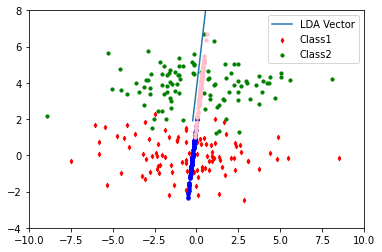

In [ ]:
plt.scatter(X1[:,0], X1[:,1], marker='d', color ='r', s = 10, label = 'Class1')
plt.scatter(X2[:,0], X2[:,1], marker='o', color ='g', s = 10, label = 'Class2')
plt.axis([-10, 10, -4, 8])
plt.plot([0, w[0] * -8]+M[0], 
         [0, w[1] * -8]+M[1], label = 'LDA Vector')
plt.scatter(LpYX1[0,:]+M[0], LpYX1[1,:], color = 'b', s = 11)
plt.scatter(LpYX2[0,:]+M[0], LpYX2[1,:], color = 'pink', s = 11)
plt.legend()
plt.show()